In [1]:
# import zipfile
# import os

# # Specify the path to the zip file and the extraction directory
# zip_file_path = '/Users/macbookair/Documents/UFSM/PosidoniaShapes/years.zip'  # Update this to your actual file path
# extraction_directory = '/Users/macbookair/Documents/UFSM/PosidoniaShapes/newyea'

# # Create a directory for extraction if it doesn't exist
# if not os.path.exists(extraction_directory):
#     os.makedirs(extraction_directory)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_directory)

# # List the extracted files
# extracted_files = os.listdir(extraction_directory)
# print("Extracted files:", extracted_files)


In [2]:
# import geopandas as gpd

# #load 
# shapefile_path ='/Users/macbookair/Documents/UFSM/PosidoniaShapes/years'
# gdf = gpd.read_file(shapefile_path)

# print(gdf.head())

In [3]:
# gdf

,id,id_2,geometry
0,8,1,"POLYGON ((102587.248 5010527.124, 102588.316 5..."
1,9,1,"POLYGON ((102652.403 5010293.205, 102660.948 5..."
2,9,1,"POLYGON ((102993.518 5010461.88, 102993.518 50..."
3,10,1,"POLYGON ((103505.605 5010532.579, 103518.98 50..."
4,11,1,"POLYGON ((103589.679 5010578.437, 103625.984 5..."


In [1]:
import os
import geopandas as gpd
import pandas as pd

# Directory containing your shapefiles for different years
shapefile_directory = '/Users/macbookair/Documents/UFSM/PosidoniaShapes/years'

# List to hold area data for each year
areas = []

# Loop through each shapefile in the directory
for file in os.listdir(shapefile_directory):
    if file.endswith('.shp'):
        print(f"Processing file: {file}")  # Print the filename for debugging
        
        # Load the shapefile
        shapefile_path = os.path.join(shapefile_directory, file)
        gdf = gpd.read_file(shapefile_path)

        # Calculate the area of each polygon
        gdf['area'] = gdf.geometry.area

        # Extract year from the filename
        year = int(file.split('.')[0])  # Convert the filename to an integer (year)
        
        # Sum the area for the year
        total_area = gdf['area'].sum()
        areas.append({'year': year, 'area': total_area})

# Create a DataFrame from the aggregated area data
if areas:
    time_series_df = pd.DataFrame(areas)
    print(time_series_df)
else:
    print("No area data was aggregated.")


Processing file: 2016.shp
Processing file: 2017.shp
Processing file: 2015.shp
Processing file: 2014.shp
Processing file: 2004.shp
Processing file: 2013.shp
Processing file: 2007.shp
Processing file: 2012.shp
Processing file: 1945.shp
Processing file: 1990.shp
Processing file: 1994.shp
Processing file: 2022.shp
Processing file: 2020.shp
Processing file: 2021.shp
Processing file: 2009.shp
Processing file: 2019.shp
Processing file: 2018.shp
    year          area
0   2016  4.792075e+05
1   2017  4.726180e+05
2   2015  4.861363e+05
3   2014  5.133890e+05
4   2004  5.921216e+05
5   2013  5.094566e+05
6   2007  5.908052e+05
7   2012  5.348619e+05
8   1945  1.099587e+06
9   1990  8.177281e+05
10  1994  7.089085e+05
11  2022  3.529114e+05
12  2020  3.832951e+05
13  2021  3.745069e+05
14  2009  5.365851e+05
15  2019  4.421582e+05
16  2018  4.403730e+05


In [2]:
# Rename columns for Prophet
time_series_df.rename(columns={'year': 'ds', 'area': 'y'}, inplace=True)

# Convert the year to datetime format
time_series_df['ds'] = pd.to_datetime(time_series_df['ds'], format='%Y')

# Check the DataFrame
print(time_series_df.head())


          ds              y
0 2016-01-01  479207.503489
1 2017-01-01  472618.003067
2 2015-01-01  486136.321855
3 2014-01-01  513389.010215
4 2004-01-01  592121.575905


/Users/macbookair/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:37:24 - cmdstanpy - INFO - Chain [1] start processing
11:37:25 - cmdstanpy - INFO - Chain [1] done processing


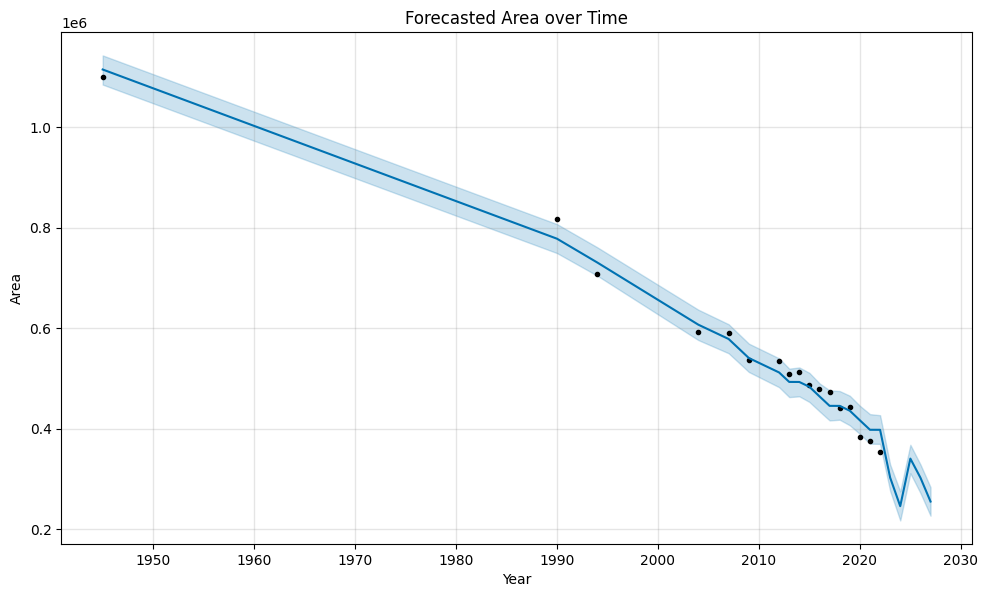

           ds          yhat    yhat_lower    yhat_upper
0  1945-01-01  1.115262e+06  1.085228e+06  1.143294e+06
1  1990-01-01  7.782655e+05  7.496366e+05  8.073336e+05
2  1994-01-01  7.307519e+05  7.045549e+05  7.610822e+05
3  2004-01-01  6.070554e+05  5.764013e+05  6.368981e+05
4  2007-01-01  5.785870e+05  5.501719e+05  6.079629e+05
5  2009-01-01  5.406568e+05  5.128978e+05  5.693376e+05
6  2012-01-01  5.119206e+05  4.826026e+05  5.400544e+05
7  2013-01-01  4.930616e+05  4.628362e+05  5.194847e+05
8  2014-01-01  4.929721e+05  4.643360e+05  5.219123e+05
9  2015-01-01  4.833820e+05  4.531948e+05  5.111607e+05
10 2016-01-01  4.642862e+05  4.345343e+05  4.902437e+05
11 2017-01-01  4.454144e+05  4.163278e+05  4.762136e+05
12 2018-01-01  4.453247e+05  4.177972e+05  4.749301e+05
13 2019-01-01  4.357346e+05  4.066845e+05  4.655741e+05
14 2020-01-01  4.166388e+05  3.894554e+05  4.455186e+05
15 2021-01-01  3.977670e+05  3.701090e+05  4.289267e+05
16 2022-01-01  3.976773e+05  3.696746e+05  4.267

In [3]:
import prophet
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(time_series_df)

# Create a future DataFrame for prediction (e.g., next 5 years)
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Visualize the forecast
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title('Forecasted Area over Time')
plt.xlabel('Year')
plt.ylabel('Area')
plt.show()

# Display the forecast DataFrame
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
